In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calendrier challenge
Ce jeu de données recense les dates du challenge (horodate) : il contient toutes les demi-heures du challenge. Un challenge dure 1 jour ou 3 jours, sur 2 plages horaires (8h-13h, 18h-21h).

La colonne id_challenge identifie la période de 1j/3j, la colonne id_periode permet de discriminer la période du matin et la période du soir.

In [15]:
calendrier_challenge = pd.read_parquet("../challenge_data/calendrier_challenge.parquet")
calendrier_challenge

,horodate,id_challenge,id_periode
16,2009-12-21 08:00:00,1,1
17,2009-12-21 08:30:00,1,1
18,2009-12-21 09:00:00,1,1
19,2009-12-21 09:30:00,1,1
20,2009-12-21 10:00:00,1,1
...,...,...,...
553,2010-12-22 12:30:00,6,1
564,2010-12-22 18:00:00,6,2
565,2010-12-22 18:30:00,6,2
566,2010-12-22 19:00:00,6,2


# Questionnaire
Le questionnaire contient les informations descriptives des foyers (catégorie d'âge, superficie, type de chauffage, type d'ECS -- eau chaude sanitaire --).

La variable `participe_challenge` permet de déterminer les clients du "groupe de contrôle".
Les données proviennent d'un petit nombre de villes en Irlande.

In [16]:
questionnaire = pd.read_parquet("../challenge_data/questionnaire.parquet")
questionnaire

,id_client,sexe,categorie_age,classe_sociale,composition_foyer,type_logement,statut_occupation,superficie_logement,nb_pieces,type_chauffage,type_ecs,nb_personnes,categorie_anciennete_construction,participe_challenge
1450,3745,Homme,36-45,Classe moyenne supérieure et classes sociales ...,Famille avec enfants,Maison mitoyenne,Accedant,232.2575,4,Elec+Autre,Elec+Autre,3,6-10 ans,True
1641,4129,Femme,65+,Travailleurs manuels,Plusieurs adultes sans enfants,Bungalow,Proprietaire,NaN,4,Elec+Autre,Elec+Autre,2,31-75 ans,True
2625,6002,Femme,65+,Travailleurs manuels,Plusieurs adultes sans enfants,Maison indépendante,Proprietaire,102.1933,4,Autre,Elec+Autre,1,>75 ans,True
1322,3496,Femme,46-55,Classe moyenne modérée et classe ouvrière qual...,Plusieurs adultes sans enfants,Maison indépendante,Accedant,NaN,3,Autre,Autre,2,31-75 ans,True
2744,6226,Homme,56-65,Classe moyenne inférieure,Plusieurs adultes sans enfants,Maison indépendante,Proprietaire,130.0642,4,Autre,Elec+Autre,4,31-75 ans,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3237,7128,Homme,56-65,Travailleurs manuels,Plusieurs adultes sans enfants,Maison indépendante,Proprietaire,NaN,4,Elec+Autre,Autre,4,31-75 ans,False
634,2199,Homme,65+,Travailleurs manuels,Plusieurs adultes sans enfants,Bungalow,Locataire public,NaN,3,Elec+Autre,Elec+Autre,2,11-30 ans,False
85,1176,Homme,36-45,Classe moyenne inférieure,Famille avec enfants,Bungalow,Proprietaire,185.8060,4,Elec+Autre,Autre,4,6-10 ans,False
2052,4904,Homme,56-65,Travailleurs manuels,Plusieurs adultes sans enfants,Maison mitoyenne,Proprietaire,NaN,3,Elec_seul,Elec+Autre,3,11-30 ans,False


# Consommations électriques
Ce dataframe contient les consommations des foyers au cours du temps. La clé de jointure avec le questionnaire est `id_client`

In [17]:
consos_challenge = pd.read_parquet("../challenge_data/consos_challenge.parquet")
consos_challenge

,id_client,horodate,puissance_W
0,1491,2009-07-15 00:00:00,0.019
1,1491,2009-07-15 00:30:00,0.112
2,1491,2009-07-15 01:00:00,0.018
3,1491,2009-07-15 01:30:00,0.011
4,1491,2009-07-15 02:00:00,0.111
...,...,...,...
15822715,6845,2011-01-01 21:30:00,2.466
15822716,6845,2011-01-01 22:00:00,0.899
15822717,6845,2011-01-01 22:30:00,1.201
15822718,6845,2011-01-01 23:00:00,0.770


# Températures
Ce dataframe contient la température moyenne en Irlande lors des pas de temps de la période d'étude. C'est la même température pour tous les clients, car nous n'avons pas d'information plus précise.

In [18]:
temperatures = pd.read_parquet("../challenge_data/temperatures.parquet")
temperatures

,horodate,temperature
0,2009-07-15 00:00:00,11.60
1,2009-07-15 00:30:00,11.50
2,2009-07-15 01:00:00,11.40
3,2009-07-15 01:30:00,11.30
4,2009-07-15 02:00:00,11.20
...,...,...
25723,2011-01-01 21:30:00,5.10
25724,2011-01-01 22:00:00,5.10
25725,2011-01-01 22:30:00,5.15
25726,2011-01-01 23:00:00,5.20


# Format attendu pour une soumission
Un jeu de données au format `id`, `horodate`, `puissance_W`. Le jeu de données peut contenir l'ensemble des pas de temps, ou seulement ceux du challenge, au choix.
Si le jeu de données contient tous les pas de temps, les pas de temps hors périodes du challenge seront ignorés lors de l'évaluation des performances.

# Exemple de soumission (naïve)

In [19]:
# On remplace par la valeur 7j plus tôt
consos_challenge["horodate_7j"] = consos_challenge['horodate'] + pd.DateOffset(days=-7)

forecast_consos = (
    calendrier_challenge[["horodate"]]
    .merge(
        consos_challenge[["id_client", "horodate_7j", "puissance_W"]],
        left_on="horodate",
        right_on="horodate_7j",
        how="inner"
    )
    .drop(columns=["horodate_7j"])
)
del consos_challenge["horodate_7j"]

forecast_consos.to_parquet("../output_data/consos.parquet")

In [20]:
# Suite à venir : dépôt sur plate-forme

# Fonctions utiles

<AxesSubplot: title={'center': 'Conso client'}, xlabel='horodate'>

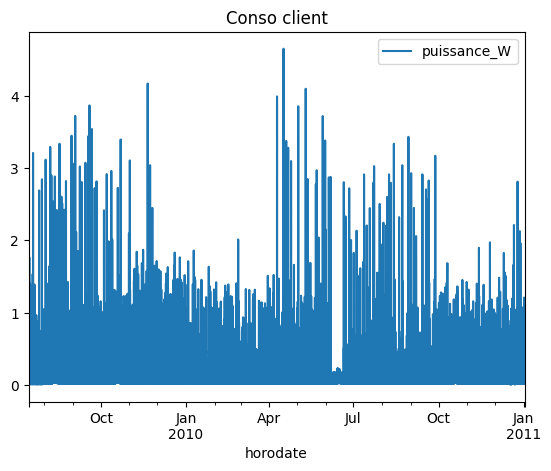

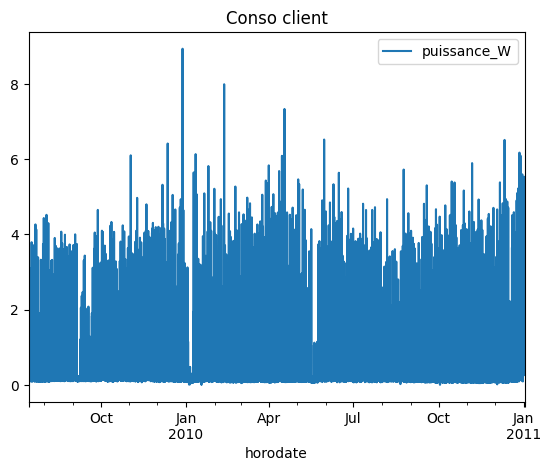

In [21]:
def plot_conso_client(id_client):
    conso_plot = consos_challenge.loc[consos_challenge['id_client']==id_client].plot(x='horodate', y='puissance_W', title='Conso client')
    return(conso_plot)

plot_conso_client(1491)
plot_conso_client(6845)